# Cosmic Classifier: Machine Learning Approach for Celestial Object Classification

Understanding and categorizing cosmic objects based on their physical and environmental properties is crucial in astrophysics. This project focuses on building a robust machine learning pipeline to classify celestial bodies using a dataset containing various planetary attributes such as atmospheric density, surface temperature, gravity, and radiation levels.

The dataset used for training exhibits class imbalance, requiring the application of oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) to ensure balanced model training. Extensive preprocessing steps, including missing value imputation using KNN, outlier detection and treatment through winsorization, and feature engineering, were performed to enhance data quality.

For classification, an ensemble learning approach combining Random Forest and XGBoost was implemented. Hyperparameter tuning using GridSearchCV was performed to optimize model performance. Finally, the trained ensemble model was evaluated on a test dataset, and predictions were generated and stored for further analysis.

This study demonstrates the effectiveness of ensemble learning in classifying celestial objects and provides insights into the key features influencing their categorization.



## Importing Necessary Libraries

Install Necessary Libraries

Installs imbalanced-learn (for handling imbalanced datasets) and xgboost.
Import Required Libraries

NumPy, Pandas, Matplotlib, and Seaborn for data handling and visualization.

train_test_split, GridSearchCV, RandomizedSearchCV for data splitting & hyperparameter tuning.

RandomForestClassifier, XGBClassifier, and VotingClassifier for model training and ensemble learning.

SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance.

KNNImputer for handling missing values.
winsorize to remove extreme outliers.

In [17]:
import sys
!"{sys.executable}" -m pip install imbalanced-learn
!pip install xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
from scipy.stats.mstats import winsorize
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import gdown

## Importing dataset and Cleaning data

Dataset link:https://drive.google.com/drive/folders/10XTLxBf_f1Ny4OPnKrTM1pFwqUhYPn1u

In [18]:

train_file_id = "1QcJ_RusjALun_-f0KRCPxiLrvv8PPJhf"
output_path = "/content/cosmicclassifierTraining.csv"

gdown.download(f"https://drive.google.com/uc?id={train_file_id}", output_path, quiet=False)
df = pd.read_csv(output_path)

test_file_id = "11madM3uMhclWgi4wwWaFI0OWXPT1jPQ8"
test_output_path = "/content/test.csv"
gdown.download(f"https://drive.google.com/uc?id={test_file_id}", test_output_path, quiet=False)
test_df = pd.read_csv(test_output_path)


Downloading...
From: https://drive.google.com/uc?id=1QcJ_RusjALun_-f0KRCPxiLrvv8PPJhf
To: /content/cosmicclassifierTraining.csv
100%|██████████| 6.44M/6.44M [00:00<00:00, 36.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=11madM3uMhclWgi4wwWaFI0OWXPT1jPQ8
To: /content/test.csv
100%|██████████| 1.08M/1.08M [00:00<00:00, 117MB/s]


In [3]:
df.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0


In [4]:
#counting the occurence of classes in  prediction column to check for imbalance
class_counts = df['Prediction'].value_counts()

print(class_counts)

Prediction
1.0    6393
7.0    5929
3.0    5814
9.0    5650
2.0    5647
6.0    5638
0.0    5637
8.0    5568
4.0    5553
5.0    5132
Name: count, dtype: int64


### Outlier Detection

**Outlier Detection** is the process of identifying data points that **significantly differ** from the rest of the dataset. These outliers can **skew model performance** and lead to incorrect predictions.  

### **🔹 Common Outlier Detection Methods**
1. **Z-Score (Standardization)**  
   - Uses the mean and standard deviation to detect values **beyond a threshold** (e.g., `|Z| > 3`).  

2. **IQR (Interquartile Range) Method**  
   - Flags values that fall **outside** `Q1 - 1.5*IQR` or `Q3 + 1.5*IQR`.  

3. **Winsorization (Used in Your Code)**  
   - **Limits extreme values** instead of removing them by capping them within a certain percentile range.  

4. **Visualization Techniques**  
   - **Boxplots & Histograms** help in spotting outliers visually.  



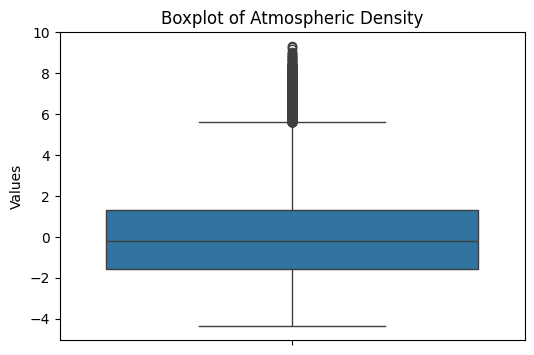

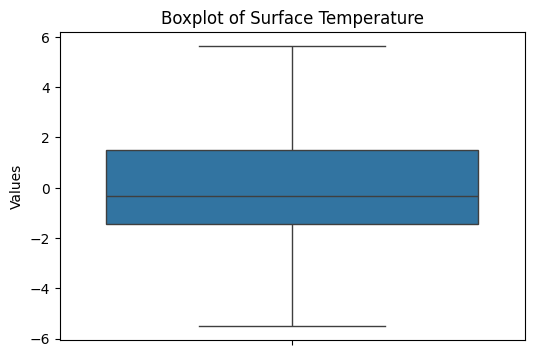

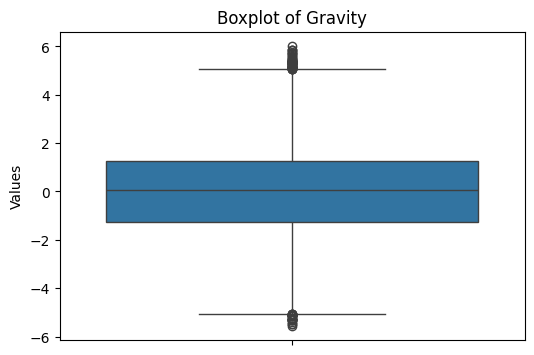

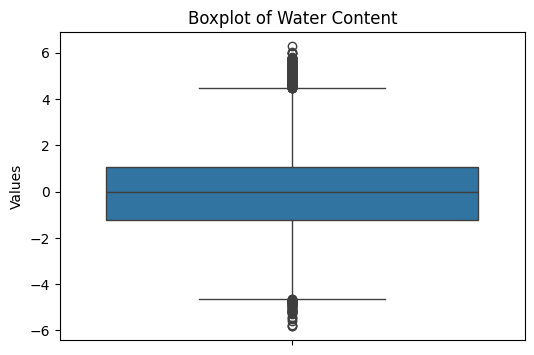

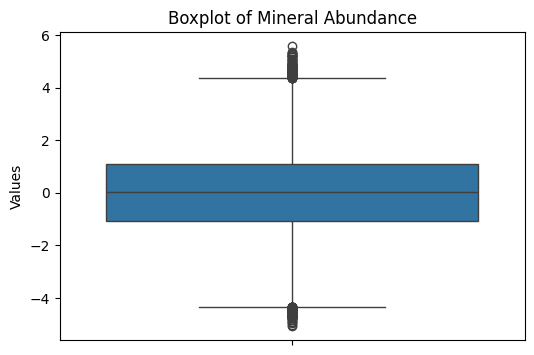

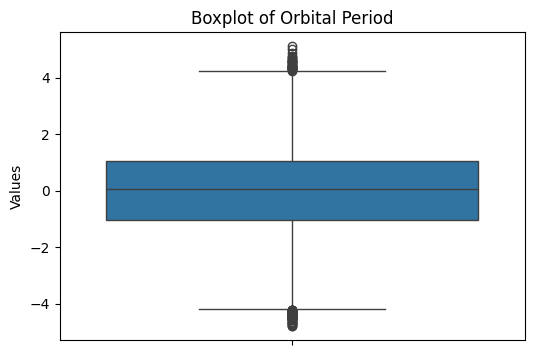

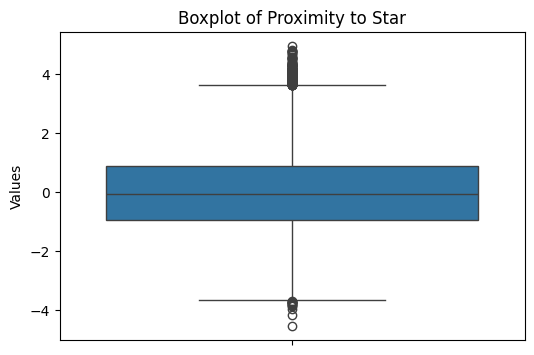

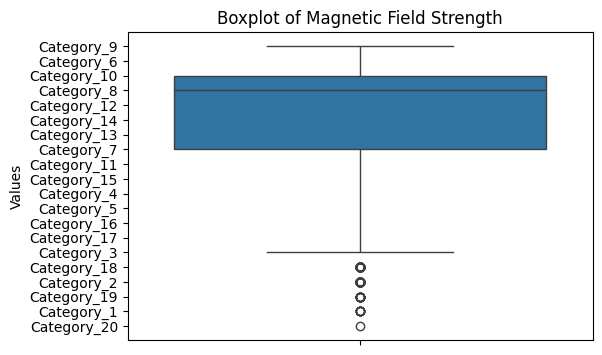

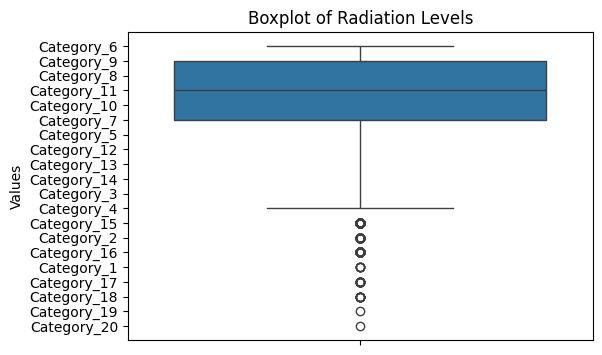

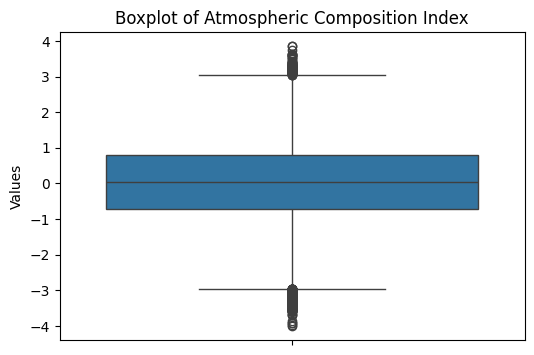

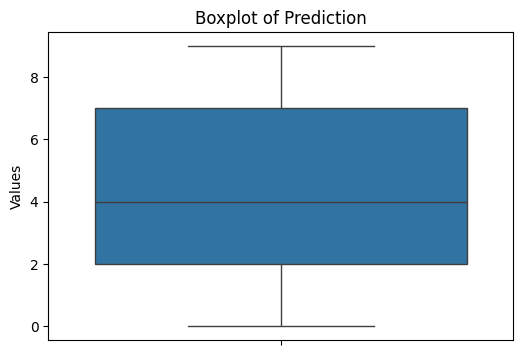

In [ ]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Values")
    plt.show()


In [ ]:
print(df['Magnetic Field Strength'].unique())
print(df['Radiation Levels'].unique())

[nan 'Category_9' 'Category_6' 'Category_10' 'Category_8' 'Category_12'
 'Category_14' 'Category_13' 'Category_7' 'Category_11' 'Category_15'
 'Category_4' 'Category_5' 'Category_16' 'Category_17' 'Category_3'
 'Category_18' 'Category_2' 'Category_19' 'Category_1' 'Category_20']
['Category_6' 'Category_9' 'Category_8' 'Category_11' 'Category_10'
 'Category_7' 'Category_5' 'Category_12' 'Category_13' nan 'Category_14'
 'Category_3' 'Category_4' 'Category_15' 'Category_2' 'Category_16'
 'Category_1' 'Category_17' 'Category_18' 'Category_19' 'Category_20']


### Handling Missing Values

Median imputation for numerical columns (to handle skewed distributions).

Mode imputation for categorical columns (to replace missing values with the most frequent category).

 Numerical Columns (9)

These columns have continuous values (float64 type):

Atmospheric Density,
Surface Temperature,
Gravity,
Water Content,
Mineral Abundance,
Orbital Period,
Proximity to Star,
Atmospheric Composition Index,
Prediction,

 Categorical Columns (2)
These columns are non-numeric (object type):

Magnetic Field Strength
,Radiation Levels

In [ ]:
missing_values = df.isnull().sum()
total_rows = len(df)

missing_percentage = (missing_values / total_rows) * 100
print(missing_percentage)


Atmospheric Density              4.973333
Surface Temperature              5.053333
Gravity                          4.973333
Water Content                    5.128333
Mineral Abundance                4.868333
Orbital Period                   4.995000
Proximity to Star                4.908333
Magnetic Field Strength          5.096667
Radiation Levels                 5.035000
Atmospheric Composition Index    4.903333
Prediction                       5.065000
dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Atmospheric Density            57016 non-null  float64
 1   Surface Temperature            56968 non-null  float64
 2   Gravity                        57016 non-null  float64
 3   Water Content                  56923 non-null  float64
 4   Mineral Abundance              57079 non-null  float64
 5   Orbital Period                 57003 non-null  float64
 6   Proximity to Star              57055 non-null  float64
 7   Magnetic Field Strength        56942 non-null  object 
 8   Radiation Levels               56979 non-null  object 
 9   Atmospheric Composition Index  57058 non-null  float64
 10  Prediction                     56961 non-null  float64
dtypes: float64(9), object(2)
memory usage: 5.0+ MB


In [5]:
df = df.dropna(subset=['Prediction'])
#as precentage is approximately 5 % we can drop null rows in Prediction column.


### Conversion of Categorical Columns into Numerical Columns

This code converts categorical values in **"Magnetic Field Strength"** and **"Radiation Levels"** into numerical form by removing the Category_ prefix and converting the remaining number to an integer. If the value is already numeric or missing (NaN), it remains unchanged. This transformation ensures that categorical data is properly formatted for machine learning models while preserving meaningful category distinctions.

In [6]:

df[['Magnetic Field Strength', 'Radiation Levels']] = df[['Magnetic Field Strength', 'Radiation Levels']].applymap(
    lambda x: int(x.replace('Category_', '')) if isinstance(x, str) else x
)



<ipython-input-6-ef3212f6d1f2>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Magnetic Field Strength', 'Radiation Levels']] = df[['Magnetic Field Strength', 'Radiation Levels']].applymap(


### Imputer for Missing Values

This code handles missing values in **numerical columns** using the **K-Nearest Neighbors (KNN) imputation method**. First, it defines numerical columns, including **atmospheric density, temperature, gravity, and others**. Then, it applies KNNImputer(n_neighbors=5), which fills missing values by averaging the values of the **five nearest neighbors** in the dataset. This ensures a more accurate imputation by considering data patterns rather than using simple mean or median replacements.

In [7]:


# lets differentiate numerical and categorical columns
numerical_cols = ['Atmospheric Density', 'Surface Temperature', 'Gravity', 'Water Content',
                  'Mineral Abundance', 'Orbital Period', 'Proximity to Star', 'Atmospheric Composition Index','Magnetic Field Strength', 'Radiation Levels']



knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])



In [ ]:

print(df.dtypes)

Atmospheric Density              float64
Surface Temperature              float64
Gravity                          float64
Water Content                    float64
Mineral Abundance                float64
Orbital Period                   float64
Proximity to Star                float64
Magnetic Field Strength          float64
Radiation Levels                 float64
Atmospheric Composition Index    float64
Prediction                       float64
dtype: object


##Handling Outliers


This function **calculates the percentage of outliers** in each **numerical column** of a dataframe using the **Interquartile Range (IQR) method**. It first skips non-numeric columns, then computes **Q1 (25th percentile) and Q3 (75th percentile)** for each numeric column. The **IQR (Q3 - Q1)** is used to determine the **lower and upper bounds** for outlier detection. Any values outside these bounds are considered outliers. The function then calculates the percentage of outliers in each column and returns the results, helping identify features that may need outlier handling.

In [ ]:
def outlier_percentage(df):
    outlier_percentages = {}

    for col in df.columns:
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Skipping non-numeric column: {col}")
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1


        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)


        num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        total_values = len(df[col])

        outlier_percent = (num_outliers / total_values) * 100
        outlier_percentages[col] = round(outlier_percent, 2)

    return outlier_percentages


outlier_percents = outlier_percentage(df)
for col, percent in outlier_percents.items():
    print(f"Percentage of outliers in column {col}: {percent}%")

Percentage of outliers in column Atmospheric Density: 1.98%
Percentage of outliers in column Surface Temperature: 0.0%
Percentage of outliers in column Gravity: 0.16%
Percentage of outliers in column Water Content: 0.7%
Percentage of outliers in column Mineral Abundance: 0.48%
Percentage of outliers in column Orbital Period: 0.23%
Percentage of outliers in column Proximity to Star: 0.5%
Percentage of outliers in column Magnetic Field Strength: 2.38%
Percentage of outliers in column Radiation Levels: 0.79%
Percentage of outliers in column Atmospheric Composition Index: 0.64%
Percentage of outliers in column Prediction: 0.0%


### Outlier Treatment Using Winsorization

This function **applies Winsorization** to numerical columns in a dataframe to handle outliers. It first selects only numeric columns and computes the **Interquartile Range (IQR)** to identify outliers. If a column contains outliers, it applies **Winsorization**, which **limits extreme values** to a specified percentile range (limits=(0.05, 0.05), meaning the bottom and top 5% of values are adjusted). The modified columns are returned, and the dataframe is updated with the transformed values, ensuring that extreme values do not overly influence the model.

In [8]:

def apply_winsorization(df, limits=(0.05, 0.05)):
    numeric_df = df.select_dtypes(include=['number']).copy()
    modified_columns = []

    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        num_outliers = ((numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)).sum()

        if num_outliers > 0:
            numeric_df[col] = winsorize(numeric_df[col], limits=limits)
            modified_columns.append(col)

    return numeric_df, modified_columns

winsorized_df, modified_cols = apply_winsorization(df)


df.update(winsorized_df)


print("Modified Columns (Winsorized):", modified_cols)
print("\nDataFrame After Winsorization:")
print(df)

Modified Columns (Winsorized): ['Atmospheric Density', 'Gravity', 'Water Content', 'Mineral Abundance', 'Orbital Period', 'Proximity to Star', 'Magnetic Field Strength', 'Radiation Levels', 'Atmospheric Composition Index']

DataFrame After Winsorization:
       Atmospheric Density  Surface Temperature   Gravity  Water Content  \
0                 0.472806            -1.792605 -0.313872      -2.089299   
1                 4.180154            -1.157515  2.430956      -1.595850   
2                -0.129008             1.621592 -0.785741       2.081196   
3                -3.122000            -2.299818  1.072092       0.353524   
4                -1.459426             2.890268  0.148757      -0.804439   
...                    ...                  ...       ...            ...   
59995            -0.316003            -1.160519  0.544548      -1.407123   
59996             0.789506            -2.645345 -0.375569      -2.579966   
59997            -0.662563             0.642230 -1.175106    

### Boxplot after handling outliers

A **boxplot after handling outliers** visually compares the distribution of numerical features before and after outlier treatment, such as **Winsorization or other outlier-handling techniques**. It helps assess whether extreme values have been successfully adjusted while preserving the overall data distribution.  

After handling outliers, the **boxplot should show fewer extreme points** (outliers represented as dots beyond whiskers), and the **spread of the data should be more balanced**. This visualization confirms that the outlier treatment method has effectively reduced the impact of extreme values without distorting the data too much.

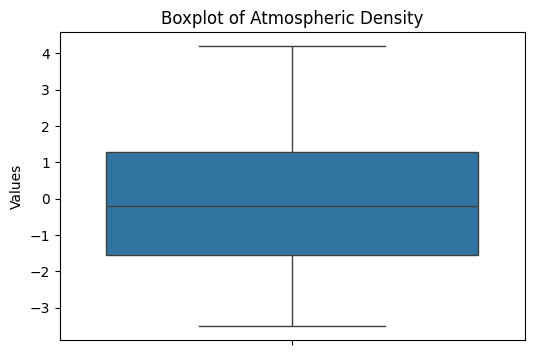

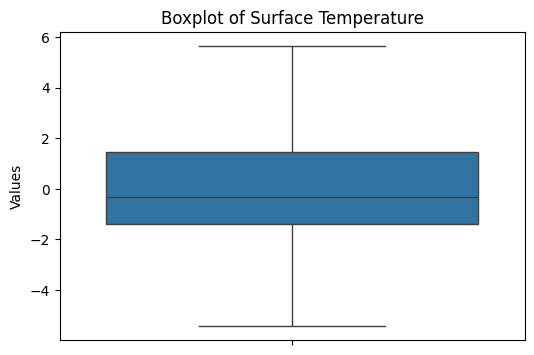

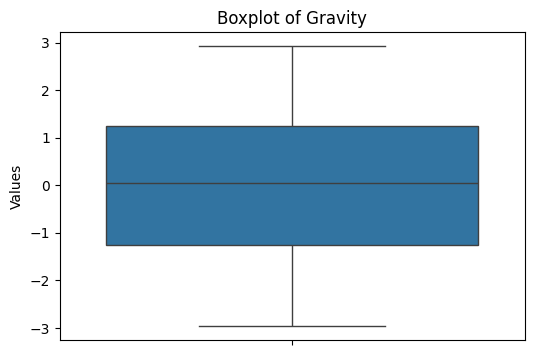

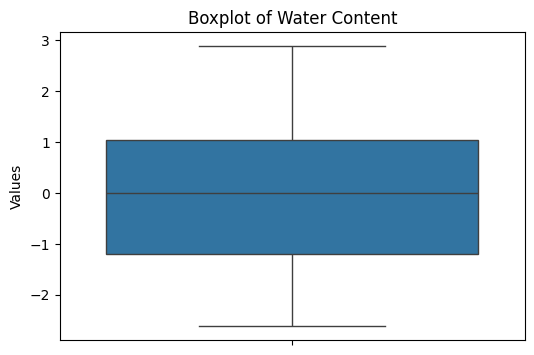

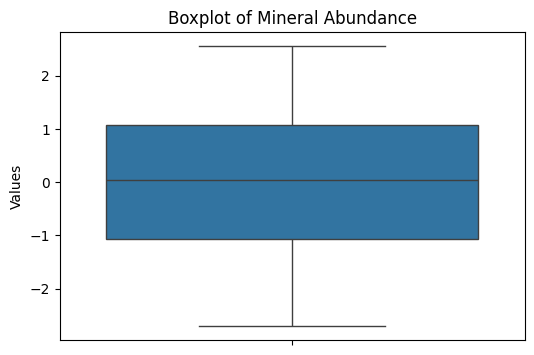

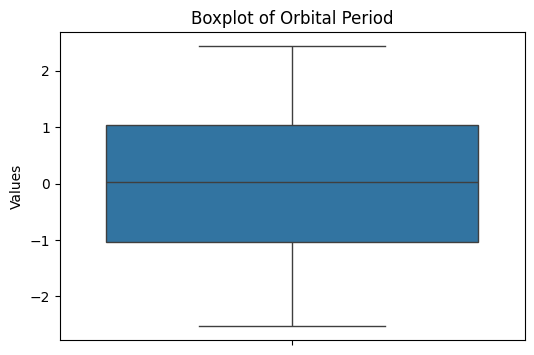

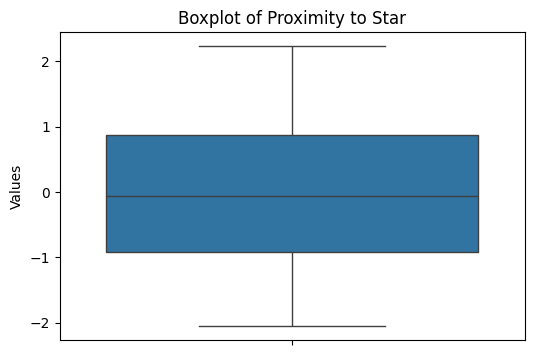

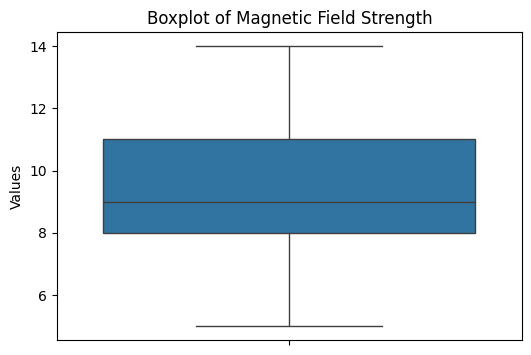

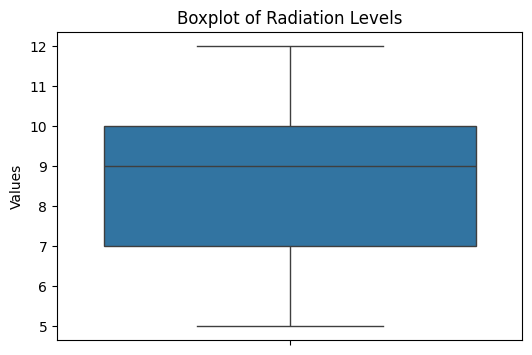

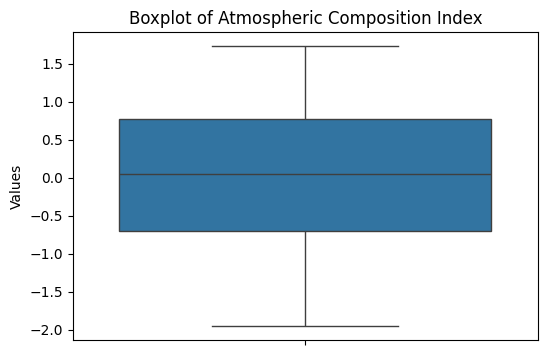

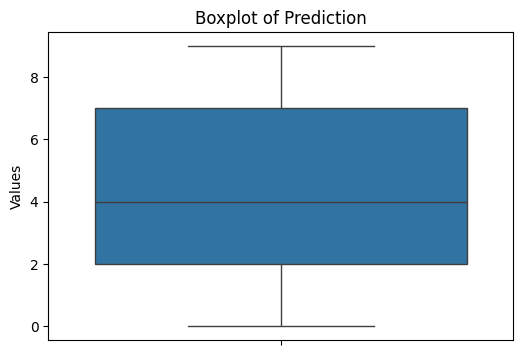

In [ ]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Values")
    plt.show()

### Correlation

**Correlation** is a statistical measure that describes the relationship between two variables. It indicates how changes in one variable are associated with changes in another.  

- **Positive correlation**: Both variables increase or decrease together.  
- **Negative correlation**: One variable increases while the other decreases.  
- **Zero correlation**: No relationship between the variables.  

In machine learning, correlation helps identify relationships between features, which can be useful for feature selection and reducing multicollinearity in models.

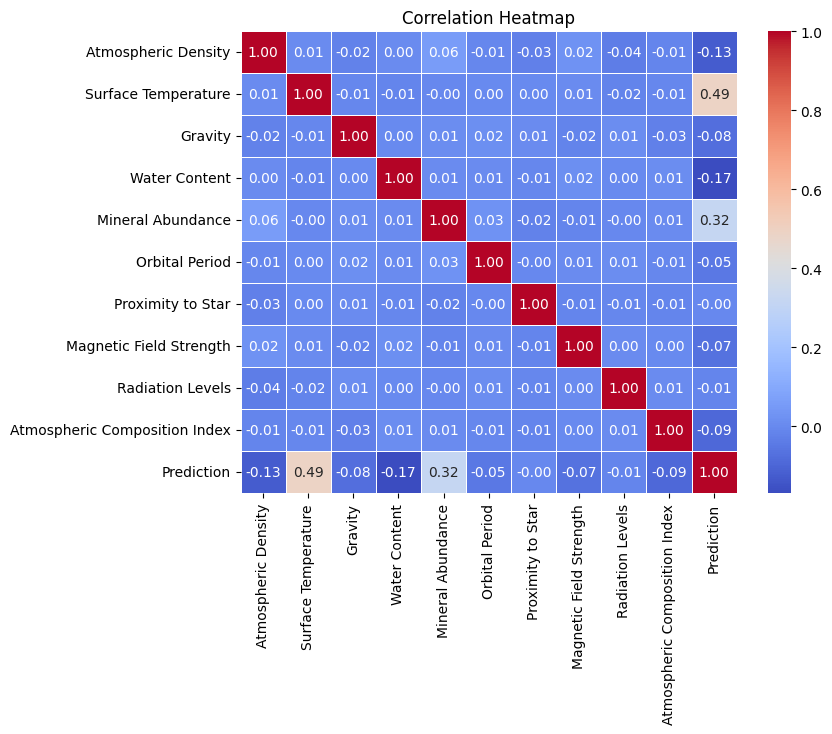

In [ ]:


corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

from heatmap,it can be concluded that there is no strong correlation between columns

After splitting the dataset into features (`X`) and target (`y`), **SMOTE (Synthetic Minority Over-sampling Technique)** is applied to handle class imbalance by generating synthetic samples for the minority class. The resampled data is then converted back into a DataFrame, ensuring a balanced distribution of classes. This step helps prevent model bias and improves overall performance.

## Model Inference


###  Handling Class Imbalance with SMOTE


X = df.drop(columns=['Prediction'])
y = df['Prediction']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Prediction'] = y_resampled



print(df_resampled['Prediction'].value_counts())

In [9]:

X = df.drop(columns=['Prediction'])
y = df['Prediction']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Prediction'] = y_resampled



print(df_resampled['Prediction'].value_counts())

Prediction
5.0    6393
0.0    6393
4.0    6393
1.0    6393
9.0    6393
2.0    6393
3.0    6393
6.0    6393
7.0    6393
8.0    6393
Name: count, dtype: int64


###Splitting data into training set and test set

In machine learning, we split the dataset into a training set and a test set to evaluate model performance. The training set is used to train the model, while the test set helps assess how well the model generalizes to new, unseen data.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [ ]:
X_test.shape

(12786, 10)

### Preparing hyparameter grids

Explanation for Hyperparameter Choices
n_estimators (Number of Trees) → [50, 100, 200]

A small number (e.g., 10) may lead to underfitting, while too many trees (e.g., 500) increase computational cost with diminishing returns.
50, 100, and 200 balance accuracy and efficiency.
max_depth (Maximum Tree Depth) → [None, 10, 20] (RF) & [3, 6, 9] (XGB)

Too shallow (e.g., 2) → Underfitting (insufficient complexity).
Too deep (e.g., 50) → Overfitting (memorizes training data).
Chosen values allow flexibility while preventing overfitting.
min_samples_split (Minimum Samples to Split a Node) → [2, 5, 10] (RF)

Lower values (e.g., 2) allow deeper trees but may cause overfitting.
Higher values (e.g., 20) make trees too shallow, leading to underfitting.
2, 5, and 10 provide a good balance.
learning_rate (Step Size for Updates) → [0.01, 0.1, 0.2] (XGB)

A high value (e.g., 0.5) makes learning unstable.
A low value (e.g., 0.001) makes learning too slow.
0.01, 0.1, and 0.2 ensure steady and efficient learning.
Why Not Other Values?
Extreme values could lead to overfitting, underfitting, or high computational costs.
Selected values were chosen based on best practices & computational efficiency.

In [11]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

### GridSearchCV for RandomForest and XGBOOST

Why GridSearchCV?

GridSearchCV was used because it systematically searches for the best hyperparameter combination by evaluating all possible values in the defined grid. The key advantages include:

1.Exhaustive Search → Tests all parameter combinations to find the optimal one.
2.Cross-Validation (cv=3) → Reduces overfitting by ensuring model performance is evaluated on different subsets of data.
3.Automated and Parallel Execution (n_jobs=-1) → Efficiently utilizes CPU resources.
4.Improved Accuracy → Helps fine-tune hyperparameters, leading to better generalization on test data.

Other Possible Options Instead of GridSearchCV

1.RandomizedSearchCV

Randomly selects parameter combinations instead of checking all possibilities.
Faster but may miss the best combination if the search space is large.

2.Bayesian Optimization (e.g., Optuna, Hyperopt)

Uses probabilistic models to guide the search efficiently.
Faster than GridSearchCV and better for large datasets, but more complex to implement.

3.Manual Hyperparameter Tuning

Adjusting parameters by trial and error based on experience.
Time-consuming and prone to suboptimal results.

->Comparison with Neural Network (NN) Accuracy
NN achieved 0.86 accuracy, suggesting it might be capturing complex patterns better.
Tree-based models (RF & XGBoost) may struggle with high-dimensional or non-linear data, but they are more interpretable and require less tuning than deep learning models.
If NN outperforms RF & XGB, further tuning (like adjusting layers, dropout, or batch size) or feature engineering may further improve performance.

In [12]:
# Train RandomForest using GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Train XGBoost using GridSearchCV
xgb = XGBClassifier(random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

In [15]:
# Ensemble Model using VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb)
], voting='soft')

ensemble.fit(X_train, y_train)

# Evaluate Ensemble Model
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy:.4f}')



Ensemble Model Accuracy: 0.9135


XGBoostError: [13:04:39] /workspace/src/metric/elementwise_metric.cu:347: Check failed: preds.Size() == info.labels.Size() (511440 vs. 51144) : label and prediction size not match, hint: use merror or mlogloss for multi-class classification
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7ff8ffa5c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xc199d2) [0x7ff9004199d2]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x61f5e2) [0x7ff8ffe1f5e2]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5fca62) [0x7ff8ffdfca62]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterEvalOneIter+0x15e) [0x7ff8ff96887e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7ff96a1cfe2e]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7ff96a1cc493]
  [bt] (7) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x7ff96a1df4d8]
  [bt] (8) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0x9c8e) [0x7ff96a1dec8e]



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


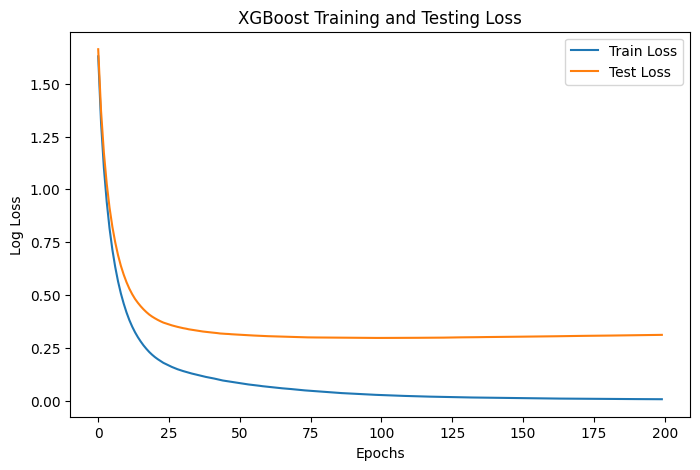

In [16]:

num_classes = len(np.unique(y_train))

xgb_eval = XGBClassifier(
    **grid_xgb.best_params_,
    random_state=42,
    eval_metric="mlogloss" if num_classes > 2 else "logloss",
    use_label_encoder=False
)

xgb_eval.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)


results = xgb_eval.evals_result()
train_loss = results['validation_0']['mlogloss'] if num_classes > 2 else results['validation_0']['logloss']
test_loss = results['validation_1']['mlogloss'] if num_classes > 2 else results['validation_1']['logloss']

# training and testing loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Training and Testing Loss')
plt.legend()
plt.show()


##Running and Checking Ensemble Accuracy


In [ ]:
from sklearn.metrics import f1_score
ensemble = VotingClassifier(
    estimators=[('RandomForest', best_rf), ('XGBoost', best_xgb)],
    voting='soft'
)

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Ensemble Accuracy: {accuracy:.4f}')
print(f'Ensemble F1 Score: {f1:.4f}')

Ensemble Accuracy: 0.9135
Ensemble F1 Score: 0.9134


Random Forest Results:
                                                params  mean_test_score
0   {'max_depth': None, 'min_samples_split': 2, 'n...         0.892050
1   {'max_depth': None, 'min_samples_split': 2, 'n...         0.893907
2   {'max_depth': None, 'min_samples_split': 2, 'n...         0.895335
3   {'max_depth': None, 'min_samples_split': 5, 'n...         0.890486
4   {'max_depth': None, 'min_samples_split': 5, 'n...         0.892597
5   {'max_depth': None, 'min_samples_split': 5, 'n...         0.893555
6   {'max_depth': None, 'min_samples_split': 10, '...         0.885441
7   {'max_depth': None, 'min_samples_split': 10, '...         0.886751
8   {'max_depth': None, 'min_samples_split': 10, '...         0.888003
9   {'max_depth': 10, 'min_samples_split': 2, 'n_e...         0.839023
10  {'max_depth': 10, 'min_samples_split': 2, 'n_e...         0.838945
11  {'max_depth': 10, 'min_samples_split': 2, 'n_e...         0.839590
12  {'max_depth': 10, 'min_samples_split': 5, 'n_e...

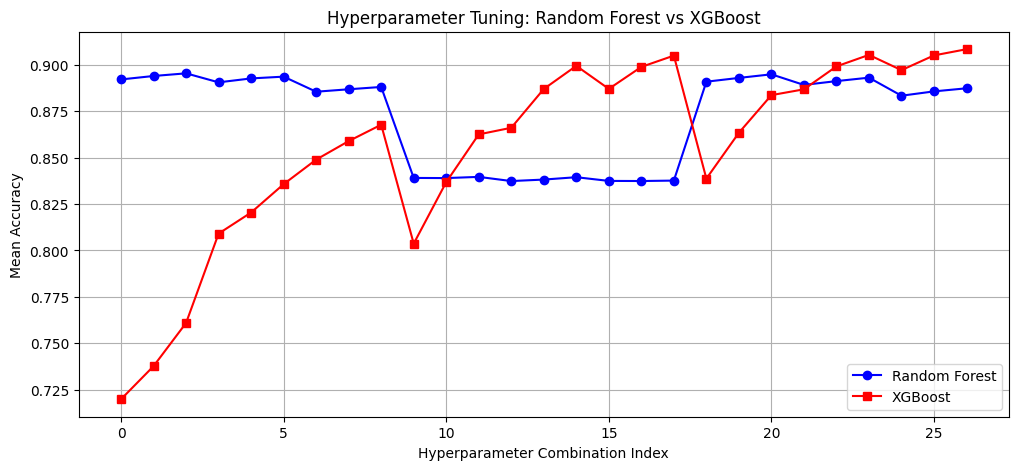

In [ ]:



rf_results = pd.DataFrame(grid_rf.cv_results_)
xgb_results = pd.DataFrame(grid_xgb.cv_results_)


print("Random Forest Results:\n", rf_results[['params', 'mean_test_score']])
print("\nXGBoost Results:\n", xgb_results[['params', 'mean_test_score']])
import numpy as np
import matplotlib.pyplot as plt


rf_scores = rf_results['mean_test_score'].values
xgb_scores = xgb_results['mean_test_score'].values


rf_idx = np.arange(len(rf_scores))
xgb_idx = np.arange(len(xgb_scores))


plt.figure(figsize=(12, 5))
plt.plot(rf_idx, rf_scores, marker='o', linestyle='-', label="Random Forest", color='blue')
plt.plot(xgb_idx, xgb_scores, marker='s', linestyle='-', label="XGBoost", color='red')


plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Mean Accuracy")
plt.title("Hyperparameter Tuning: Random Forest vs XGBoost")
plt.legend()
plt.grid()


plt.show()


## Making Predictions on Test Data

In [ ]:


test_df[['Magnetic Field Strength', 'Radiation Levels']] = test_df[['Magnetic Field Strength', 'Radiation Levels']].applymap(
    lambda x: int(x.replace('Category_', '')) if isinstance(x, str) else x
)






<ipython-input-25-099af22cd608>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_df[['Magnetic Field Strength', 'Radiation Levels']] = test_df[['Magnetic Field Strength', 'Radiation Levels']].applymap(


In [ ]:
y_pred2 = ensemble.predict(test_df)


output_df = pd.DataFrame({'Predictions': y_pred2})

output_df.to_csv("predictions.csv", index=False)

print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv
